# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - A major proportion of retail bank profit comes from interests in the form of home loans. These loans
 are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as
 bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to
 be judicious while approving loans for their customer base.
 The approval process for the loans is multifaceted. Through this process, the bank tries to check the
 creditworthiness of the applicant on the basis of a manual study of various aspects of the
 application. The entire process is not only effort-intensive but also prone to wrong
 judgment/approval owing to human error and biases. There have been attempts by many banks to automate this process by using heuristics. But with the
 advent of hm_df science and machine learning, the focus has shifted to building machines that can
 learn this approval process and make it free of biases and more efficient. At the same time, one
 important thing to keep in mind is to make sure that the machine does not learn the biases that
 previously crept in because of the human approval process.

### **The objective:**

 - A bank's consumer credit department aims to simplify the decision-making process for home equity
 lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's
 guidelines to establish an empirically derived and statistically sound model for credit scoring. The
 model will be based on the hm_df obtained via the existing loan underwriting process from recent
 applicants who have been given credit. The model will be built from predictive modeling techniques,
 but the model created must be interpretable enough to provide a justification for any adverse
 behavior (rejections).

### **The key questions:**

- **What is the likelihood that an applicant will default on their loan?**
  - Predicting the probability of default based on applicant hm_df.

- **Which features are most important in determining an applicant's creditworthiness?**
  - Identifying key factors like income, credit score, and loan amount.

- **How can we ensure that the model’s predictions are free from biases?**
  - Implementing techniques to detect and mitigate biases in historical hm_df.

- **Can the model provide interpretable reasons for each loan approval or rejection?**
  - Ensuring transparency and explainability of model decisions.

- **How can the model's performance be continuously monitored and improved over time?**
  - Establishing a framework for ongoing validation and refinement. 

### **The problem formulation**:

- Develop an interpretable predictive model to evaluate the creditworthiness of applicants for home equity lines of credit. This model should be able to assess the risk of loan default based on a set of features derived from the existing loan underwriting process. It must comply with the Equal Credit Opportunity Act's guidelines to ensure fairness and avoid biases, and it should provide clear justifications for any adverse decisions (i.e., loan rejections).

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme()

# import cudf

# from cuml import train_test_split

# from cuml import LogisticRegression

# from sklearn import metrics
# from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.ensemble import BaggingClassifier
# from cuml import RandomForestClassifier

# import scipy.stats as stats

# from cuml.model_selection import GridSearchCV


# import warnings
# warnings.filterwarnings('ignore')

### **Read the dataset**

In [3]:
hm=pd.read_csv("hmeq.csv")
# hm_cudf=cudf.read_csv("hmeq.csv")

In [4]:
type(hm)

pandas.core.frame.DataFrame

In [5]:
# Copying hm_cudf to another variable to avoid any changes to original hm_cudf
hm_df=hm.copy()

In [6]:
type(hm_df)

pandas.core.frame.DataFrame

In [7]:
hm_df.describe().T

count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

In [8]:
hm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### **Print the first and last 5 rows of the dataset**

In [9]:
# Display first five rows
hm_df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [10]:
hm_df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [11]:
# Display last 5 rows
hm_df.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [12]:
# Check the shape of the hm_df
hm_df.shape

(5960, 13)

**Insights**
- The dataset contains 5930 rows and 13 columns.

### **Check the hm_df types of the columns**

In [13]:
# Check info of the hm_df
hm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**

- The dataset contains mostly integers with int64 type.

### **Check for missing values**

In [14]:
# Analyse missing values - Hint: use isnull() function
hm_df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [15]:
# Check the percentage of missing values in the each column.
(hm_df.isnull().sum() / len(hm_df)).sort_values(ascending=False)

DEBTINC    0.212584
DEROG      0.118792
DELINQ     0.097315
MORTDUE    0.086913
YOJ        0.086409
NINQ       0.085570
CLAGE      0.051678
JOB        0.046812
REASON     0.042282
CLNO       0.037248
VALUE      0.018792
LOAN       0.000000
BAD        0.000000
dtype: float64

**Insights**

- DEBTINC column has the highest number of missing values followed by DEROG while VALUE has the lowest. 

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the hm_df space required to store the hm_dfframe`

### **Convert the hm_df types**

In [16]:
cols = hm_df.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [17]:
cols

['REASON', 'JOB', 'BAD']

In [18]:
# Changing the hm_df type of object type column to category.
for i in cols:
    hm_df[i] = hm_df[i].astype('category')

In [19]:
# Checking the info again and the hm_dftype of different variable
hm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [20]:
# Analyze the summary statistics for numerical variables
hm_df.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights**

- **LOAN**: 
  - The average loan amount is approximately $18,608, with a standard deviation of about $11,207.
  - Loan amounts range from $1,100 to $89,900, indicating a diverse set of loan sizes.

- **MORTDUE**: 
  - The average amount due on existing mortgages is around $73,761, with a significant spread (standard deviation of $44,458).
  - Values range from $2,063 to $399,550, highlighting varied mortgage debts among borrowers.

- **VALUE**: 
  - The average property value is about $101,776, with substantial variation (standard deviation of $57,386).
  - Property values range from $8,000 to $855,909, indicating a wide range of property values.

- **YOJ (Years on Job)**:
  - On average, applicants have been at their current job for roughly 8.92 years, with a standard deviation of 7.57 years.
  - The hm_df spans from newcomers (0 years) to those with long tenure (up to 41 years).

- **DEROG**: 
  - The average number of major derogatory reports is quite low at 0.25, but there's a spread (standard deviation of 0.85).
  - Most applicants have no derogatory reports (median and 75th percentile are 0).

- **DELINQ**: 
  - The average number of delinquent credit lines is 0.45, indicating most applicants have less than one delinquent credit line on average.
  - The maximum number of delinquencies is 15, showing significant variability.

- **CLAGE (Credit Line Age)**: 
  - The average age of the oldest credit line is approximately 179.77 months (around 15 years), with a range extending to 1168.23 months (around 97 years).

- **NINQ**: 
  - Applicants have, on average, 1.19 recent credit inquiries, with values ranging from 0 to 17, indicating varied recent credit activity.

- **CLNO**: 
  - The average number of existing credit lines is about 21.30, with a standard deviation of 10.14.
  - The number of credit lines ranges from 0 to 71, reflecting diverse credit utilization.

- **DEBTINC (Debt-to-Income Ratio)**: 
  - The average debt-to-income ratio is 33.78%, with some outliers reaching up to 203.31%.
  - Most applicants fall within the range of approximately 29.14% to 39.00%, showing a manageable debt load for many, but also indicating a few with very high ratios.


In [21]:
# Check summary for categorical hm_df - Hint: inside describe function you can use the argument include=['category']
hm_df.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights**

- **BAD (Loan Default Status)**:
  - There are 5,960 observations in total.
  - The variable has 2 unique values (0 and 1), with 0 indicating that the loan was repaid and 1 indicating a default.
  - The most frequent value is 0 (loan repaid), occurring 4,771 times. This suggests that a significant majority of the loans in the dataset were successfully repaid.

- **REASON (Reason for Loan Request)**:
  - There are 5,708 observations for this variable.
  - It has 3 unique categories.
  - The most common reason for requesting a loan is "DebtCon" (Debt Consolidation), with 3,928 occurrences. This indicates that many applicants are looking to consolidate their debts, which might be a significant factor in their financial strategy.

- **JOB (Job Type)**:
  - There are 5,681 observations for this variable.
  - It includes 7 unique job categories.
  - The most frequent job category is "Other," with 2,388 occurrences. This suggests that a substantial portion of applicants fall into job categories that are not specifically listed or are less common.


**Let's look at the unique values in all the categorical variables**

In [22]:
# Checking the count of unique values in each categorical column
cols_cat = hm_df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in', i, 'are:')
    print(hm_df[i].value_counts())
    print('*' * 40)


Unique values in BAD are:
BAD
0    4771
1    1189
Name: count, dtype: int64
****************************************
Unique values in REASON are:
REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64
****************************************
Unique values in JOB are:
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64
****************************************


**Insights**

### Insights from Unique Values:

- **BAD (Loan Default Status)**:
  - There are 4,771 instances where the loan was repaid (value 0).
  - There are 1,189 instances where the client defaulted on the loan (value 1).
  - This indicates that a significant majority of loans were successfully repaid, with roughly 80% of the loans being repaid and 20% defaulted.

- **REASON (Reason for Loan Request)**:
  - Debt Consolidation (DebtCon) is the most common reason for requesting a loan, with 3,928 instances.
  - Home Improvement (HomeImp) follows with 1,780 instances.
  - This suggests that a large proportion of applicants are seeking loans to consolidate existing debts, which might imply financial restructuring or optimization by the borrowers.

- **JOB (Job Type)**:
  - The most common job category is "Other," with 2,388 instances.
  - The next most frequent categories are "ProfExe" (Professional/Executive) with 1,276 instances and "Office" with 948 instances.
  - The least common categories are "Self" (self-employed) with 193 instances and "Sales" with 109 instances.
  - This distribution suggests that a large number of applicants fall into the "Other" category, which could include various less common job types or unspecified roles. There is a notable presence of professional/executive and office workers among the applicants.


### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory hm_df Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a hm_df set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical hm_df**
Histograms and box plots help to visualize and describe numerical hm_df. We use box plot and histogram to analyze the numerical columns.

In [23]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

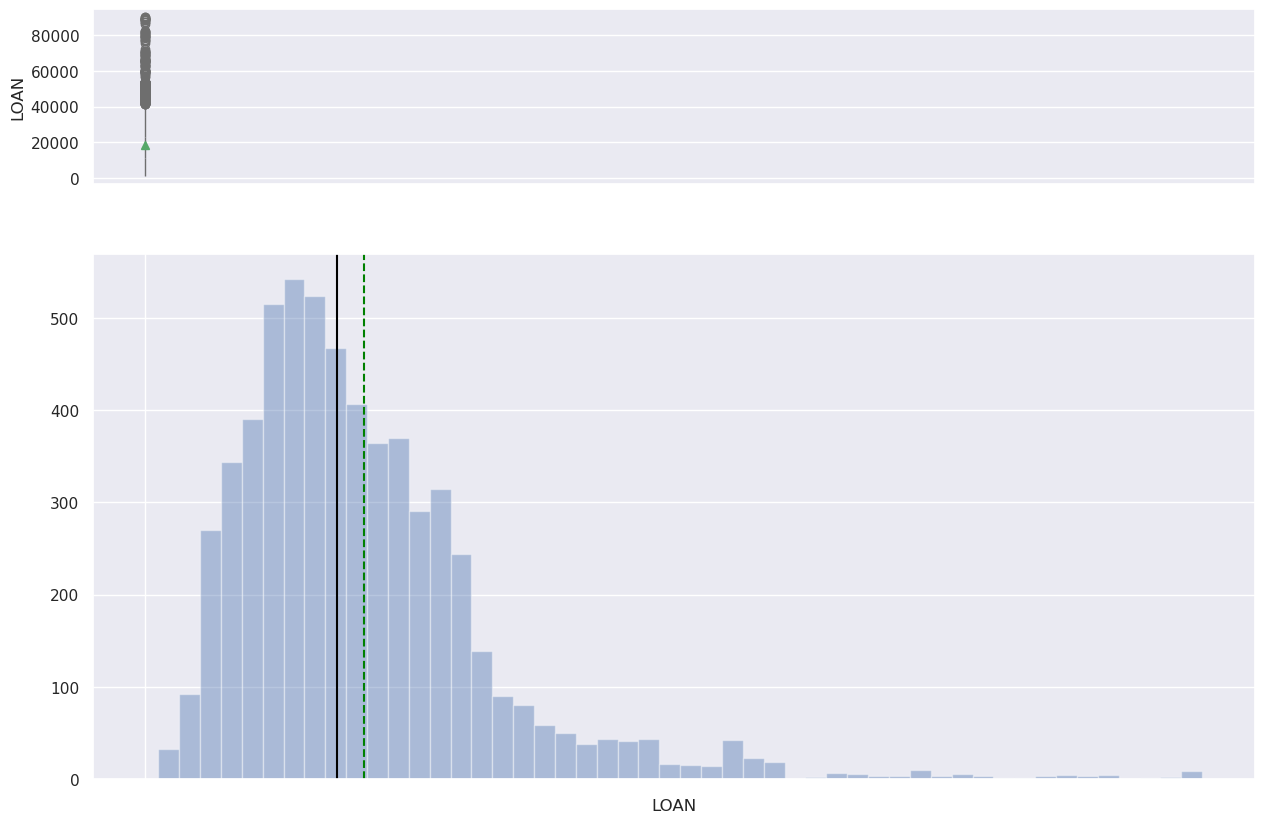

In [24]:
# Build the histogram boxplot for Loan
histogram_boxplot(hm_df['LOAN'])

**Insights**

The hm_df is right-skewed meaning that there are a number of extreme values.

#### **Note:** As done above, create a Histogram and Boxplot for other variables

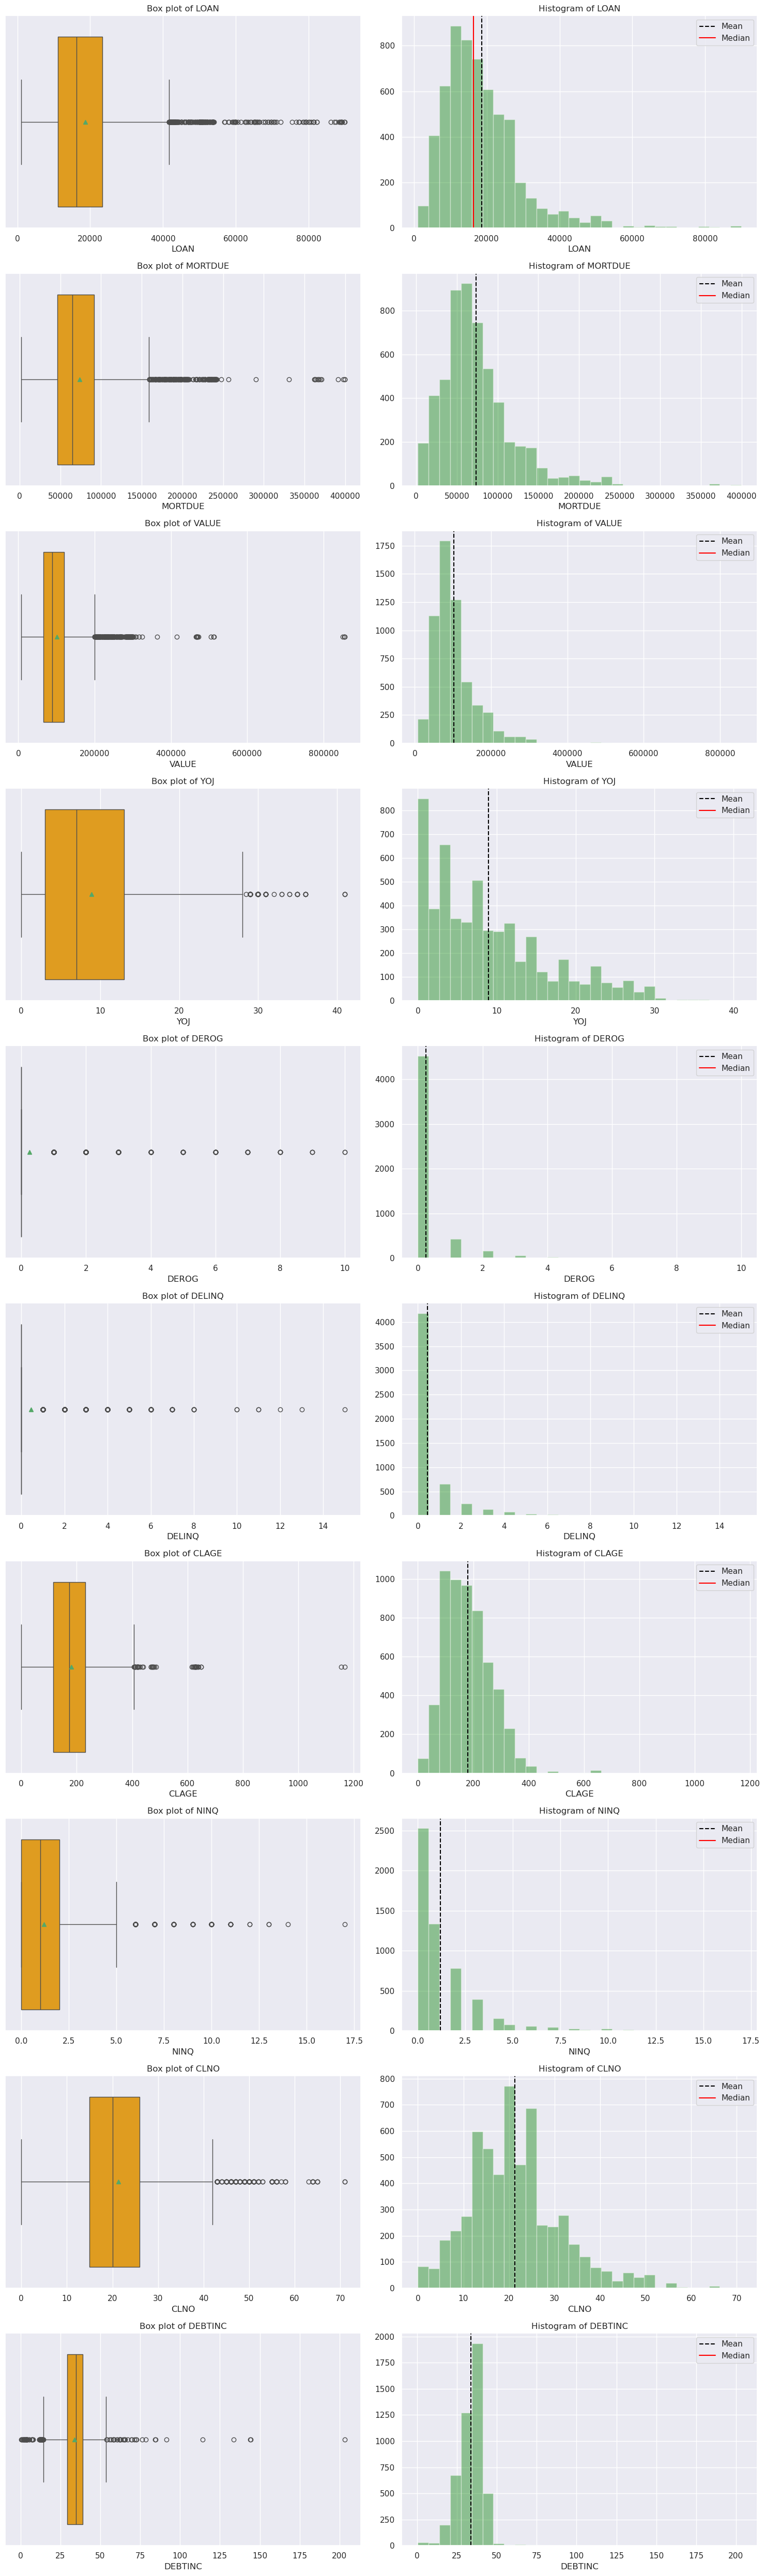

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert cuDF hm_dfFrame to pandas hm_dfFrame
hm_df_pandas = hm_df

# List of relevant columns to plot
relevant_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Create a grid of plots
fig, axes = plt.subplots(len(relevant_columns), 2, figsize=(15, len(relevant_columns) * 5))

for idx, col in enumerate(relevant_columns):
    sns.boxplot(x=hm_df_pandas[col], ax=axes[idx, 0], showmeans=True, color='orange')
    sns.distplot(hm_df_pandas[col], kde=False, ax=axes[idx, 1], bins=30, color='green')

    # Add vertical lines for mean and median
    axes[idx, 1].axvline(np.mean(hm_df_pandas[col]), color='black', linestyle='--', label='Mean')
    axes[idx, 1].axvline(np.median(hm_df_pandas[col]), color='red', linestyle='-', label='Median')

    axes[idx, 0].set_title(f'Box plot of {col}')
    axes[idx, 1].set_title(f'Histogram of {col}')
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()

### **2. Univariate Analysis - Categorical hm_df**

In [26]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

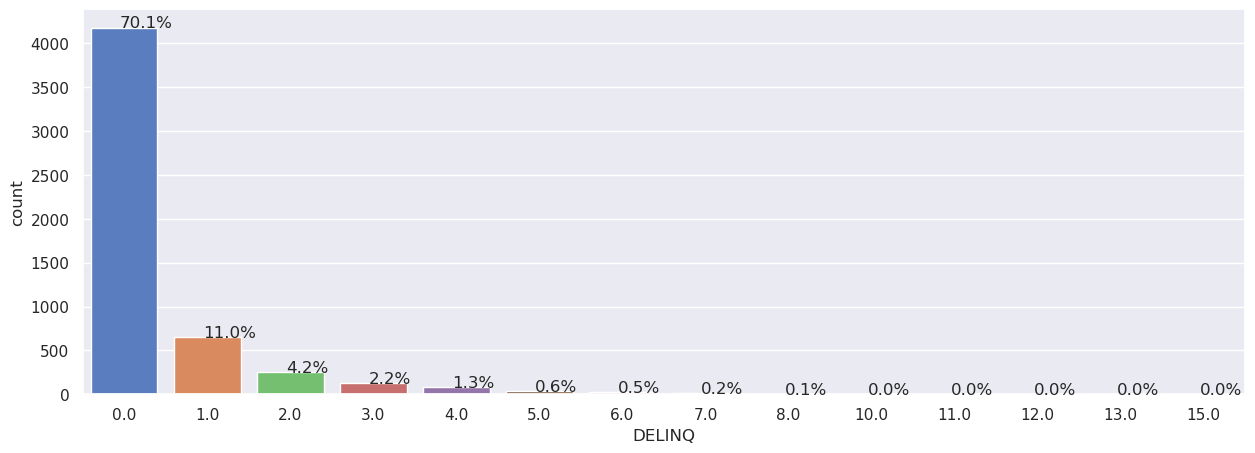

In [27]:
#Build barplot for DELINQ
plt.figure(figsize=(15,5))
ax = sns.countplot(x=hm_df["DELINQ"],palette='muted')
perc_on_bar(ax,hm_df["DELINQ"])

**Insights**

- Most of the borrowers had no delinquent lines so, relatively good credit history.
  

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

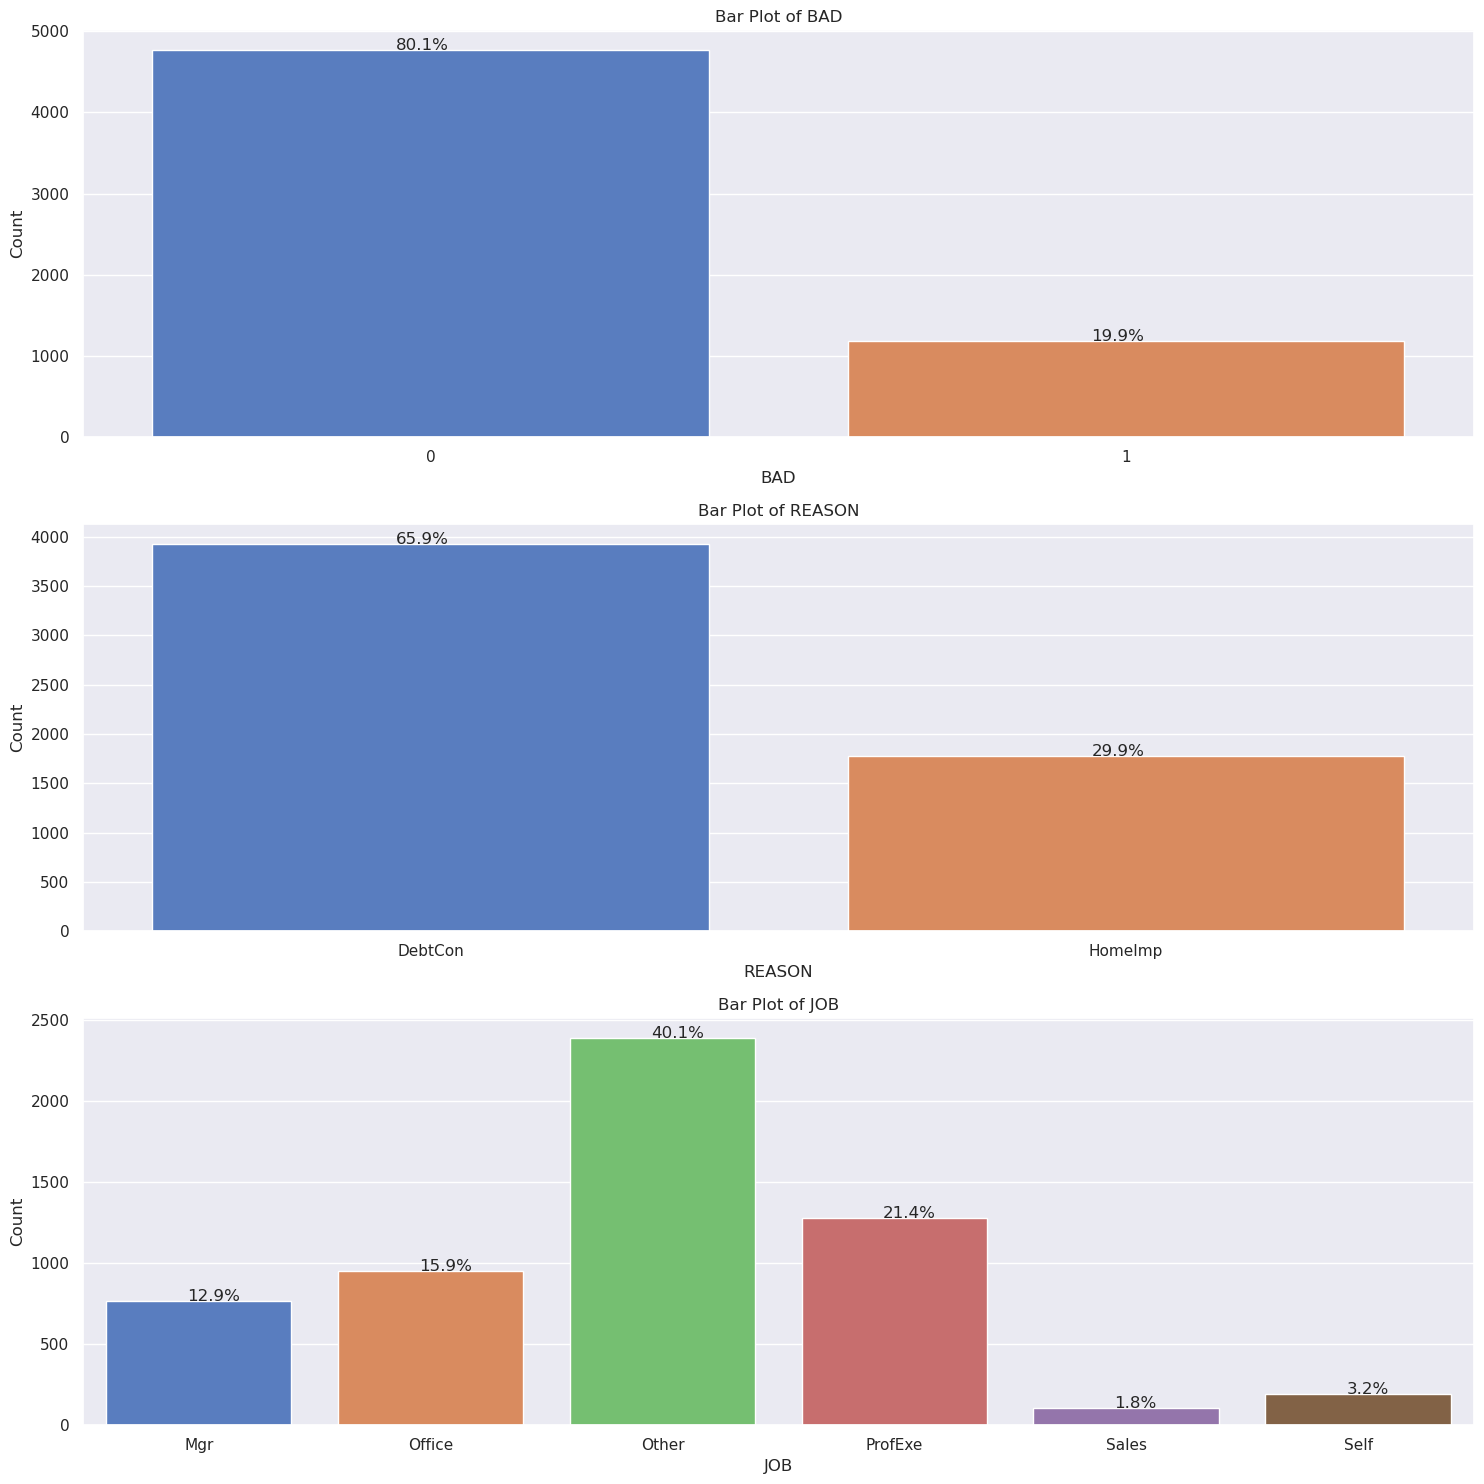

In [28]:
# Function to create bar plots that indicate percentage for each category
def perc_on_bar(ax, feature):
    '''
    ax: The axes object to draw on
    feature: categorical feature
    '''
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percentage

# List of relevant categorical columns to plot
categorical_columns = ['BAD', 'REASON', 'JOB']

# Create a grid of plots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, len(categorical_columns) * 5))

for idx, col in enumerate(categorical_columns):
    ax = sns.countplot(x=hm_df_pandas[col], palette='muted', ax=axes[idx])
    perc_on_bar(ax, hm_df_pandas[col])
    ax.set_title(f'Bar Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

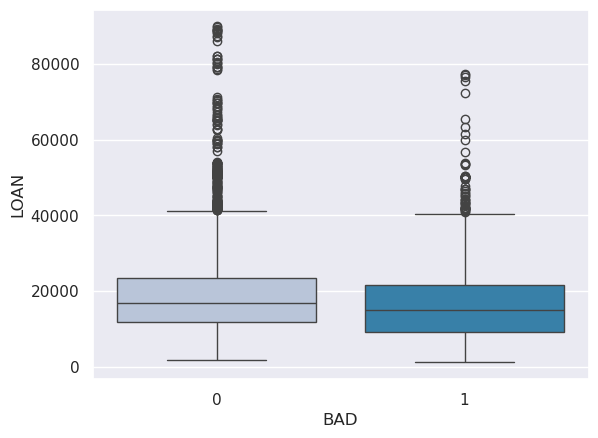

In [29]:
sns.boxplot(x=hm_df["BAD"],y=hm_df['LOAN'],palette="PuBu");

**Insights**

- There were more loans that were paid back even for higher amounts.

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

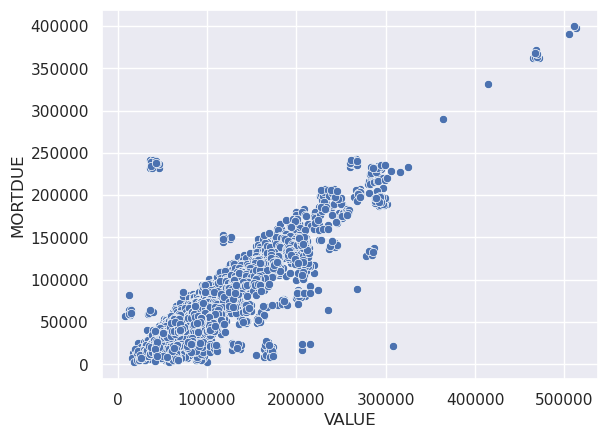

In [30]:
sns.scatterplot(x = hm_df["VALUE"], y = hm_df['MORTDUE'], palette="PuBu");

**Insights:**

- Lenders with a higher-valued properly had a higher amount due on existing mortgage.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

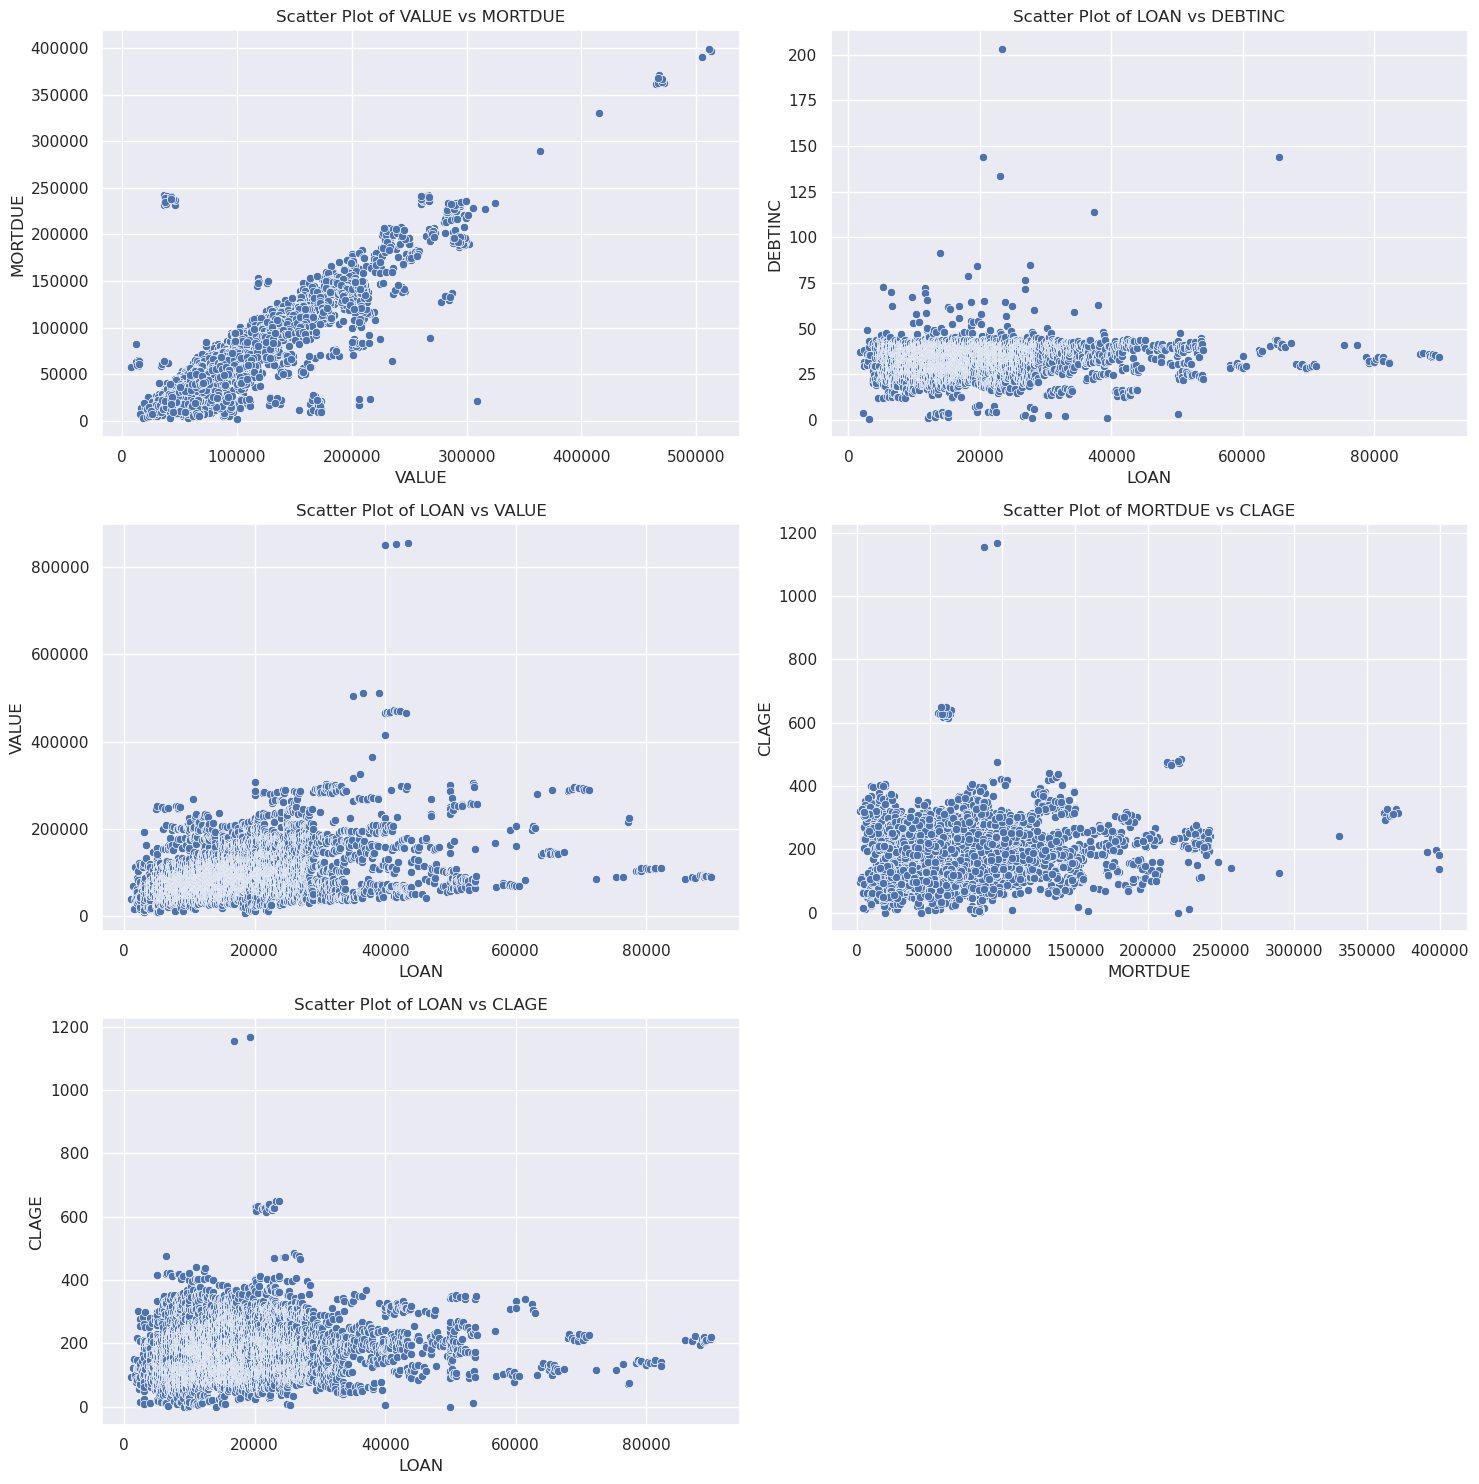

In [31]:
# List of relevant pairs of numerical columns to plot
pairs = [
    ('VALUE', 'MORTDUE'),
    ('LOAN', 'DEBTINC'),
    ('LOAN', 'VALUE'),
    ('MORTDUE', 'CLAGE'),
    ('LOAN', 'CLAGE'),
]

# Create a 2x2 grid plus one additional plot
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axes array to easily iterate
axes = axes.flatten()

for idx, (x_col, y_col) in enumerate(pairs):
    sns.scatterplot(x=hm_df[x_col], y=hm_df[y_col], ax=axes[idx], palette="PuBu")
    axes[idx].set_title(f'Scatter Plot of {x_col} vs {y_col}')
    axes[idx].set_xlabel(x_col)
    axes[idx].set_ylabel(y_col)

# Hide the last empty subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [32]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='muted')
    tab1 = pd.crosstab(x,hm_df['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,hm_df['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


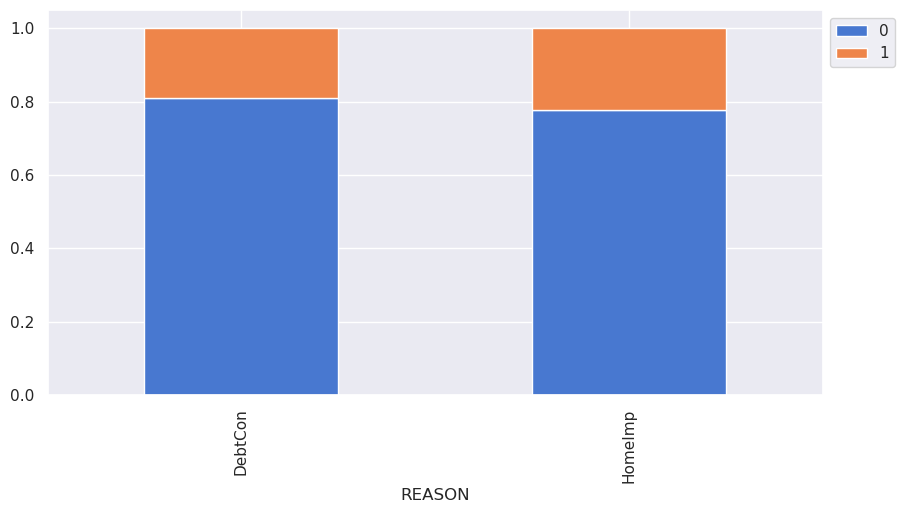

In [33]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(hm_df['REASON'])

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

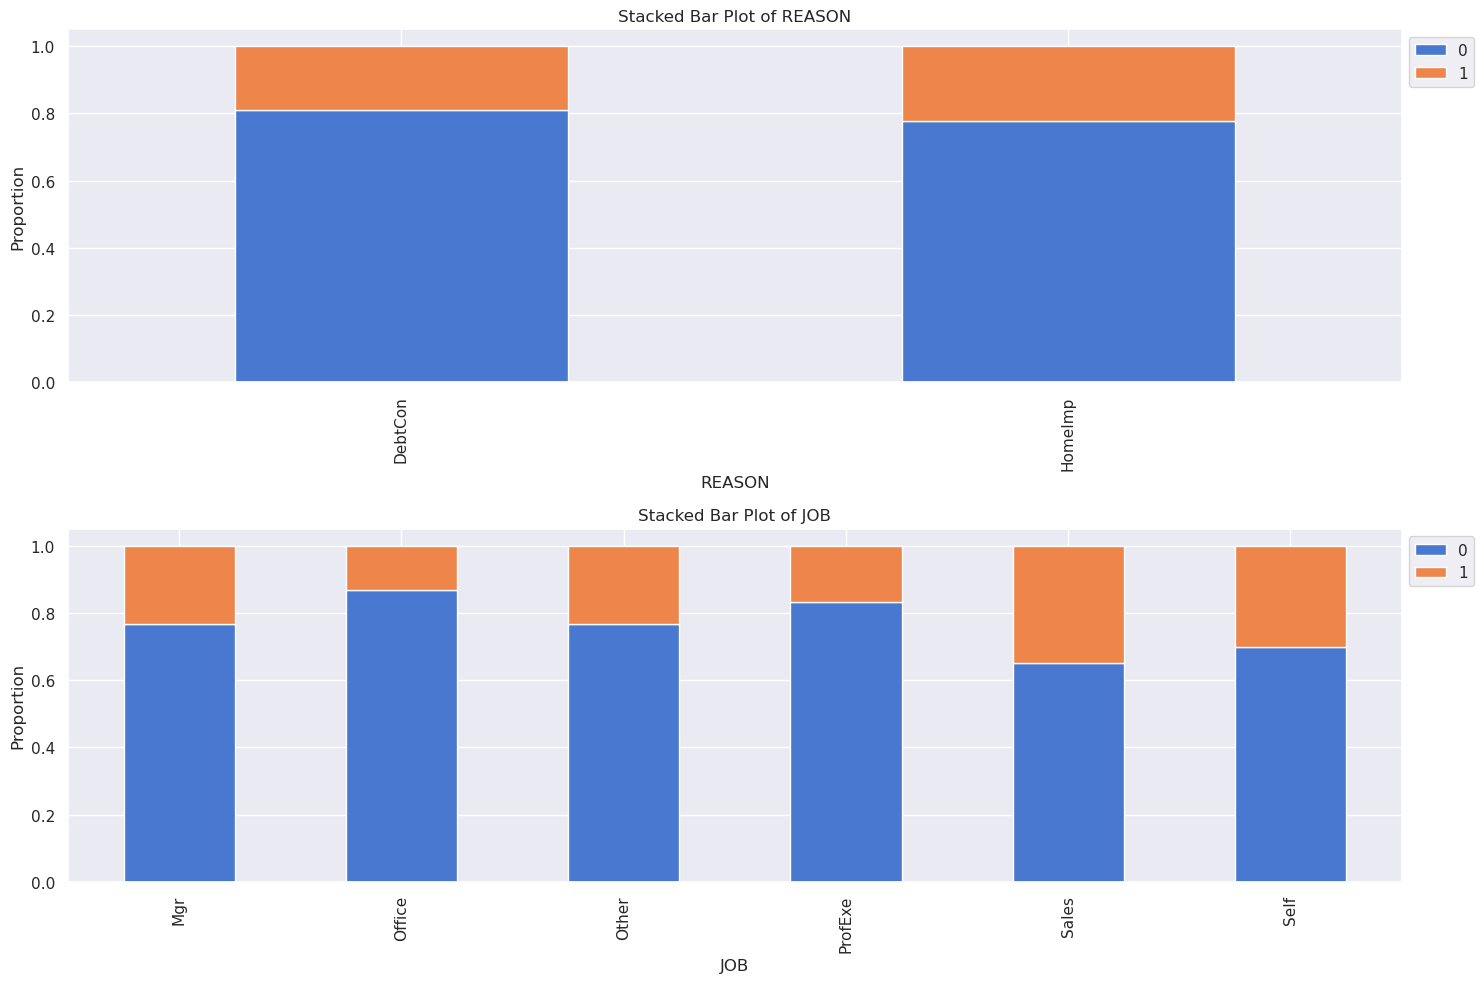

In [34]:
# Function to plot stacked bar charts for categorical columns
def stacked_plot(x, ax):
    sns.set(palette='muted')
    tab = pd.crosstab(x, hm_df_pandas['BAD'], normalize='index')
    tab.plot(kind='bar', stacked=True, ax=ax)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    ax.set_ylabel('Proportion')

# List of relevant categorical columns to plot
categorical_columns = ['REASON', 'JOB']

# Create a grid of plots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, len(categorical_columns) * 5))

for idx, col in enumerate(categorical_columns):
    stacked_plot(hm_df_pandas[col], axes[idx])
    axes[idx].set_title(f'Stacked Bar Plot of {col}')
    axes[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

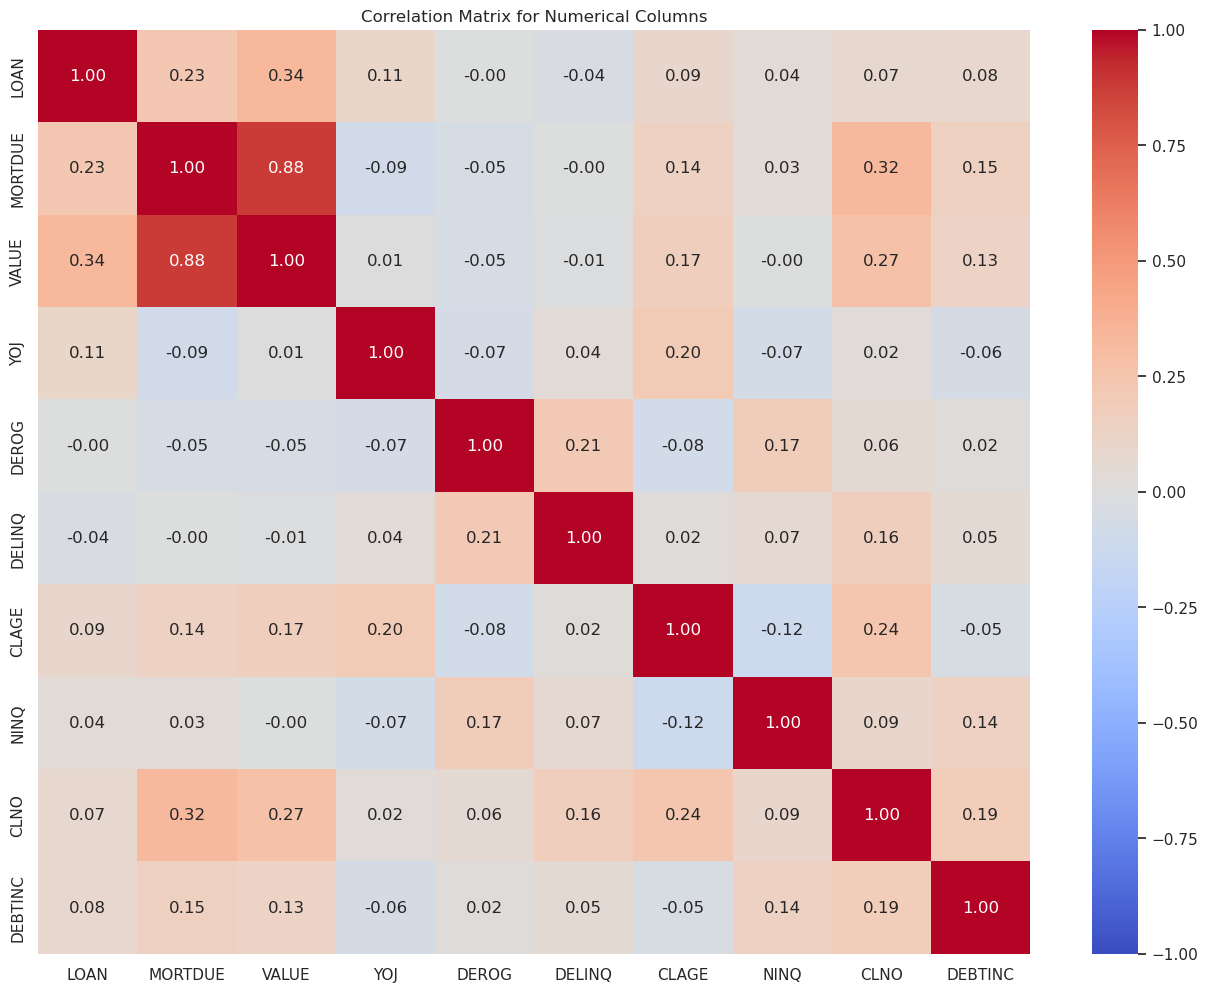

In [35]:
# Separating numerical variables
numerical_col = hm_df.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = hm_df[numerical_col].corr()

# Plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1,
            annot=True, fmt=".2f",
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

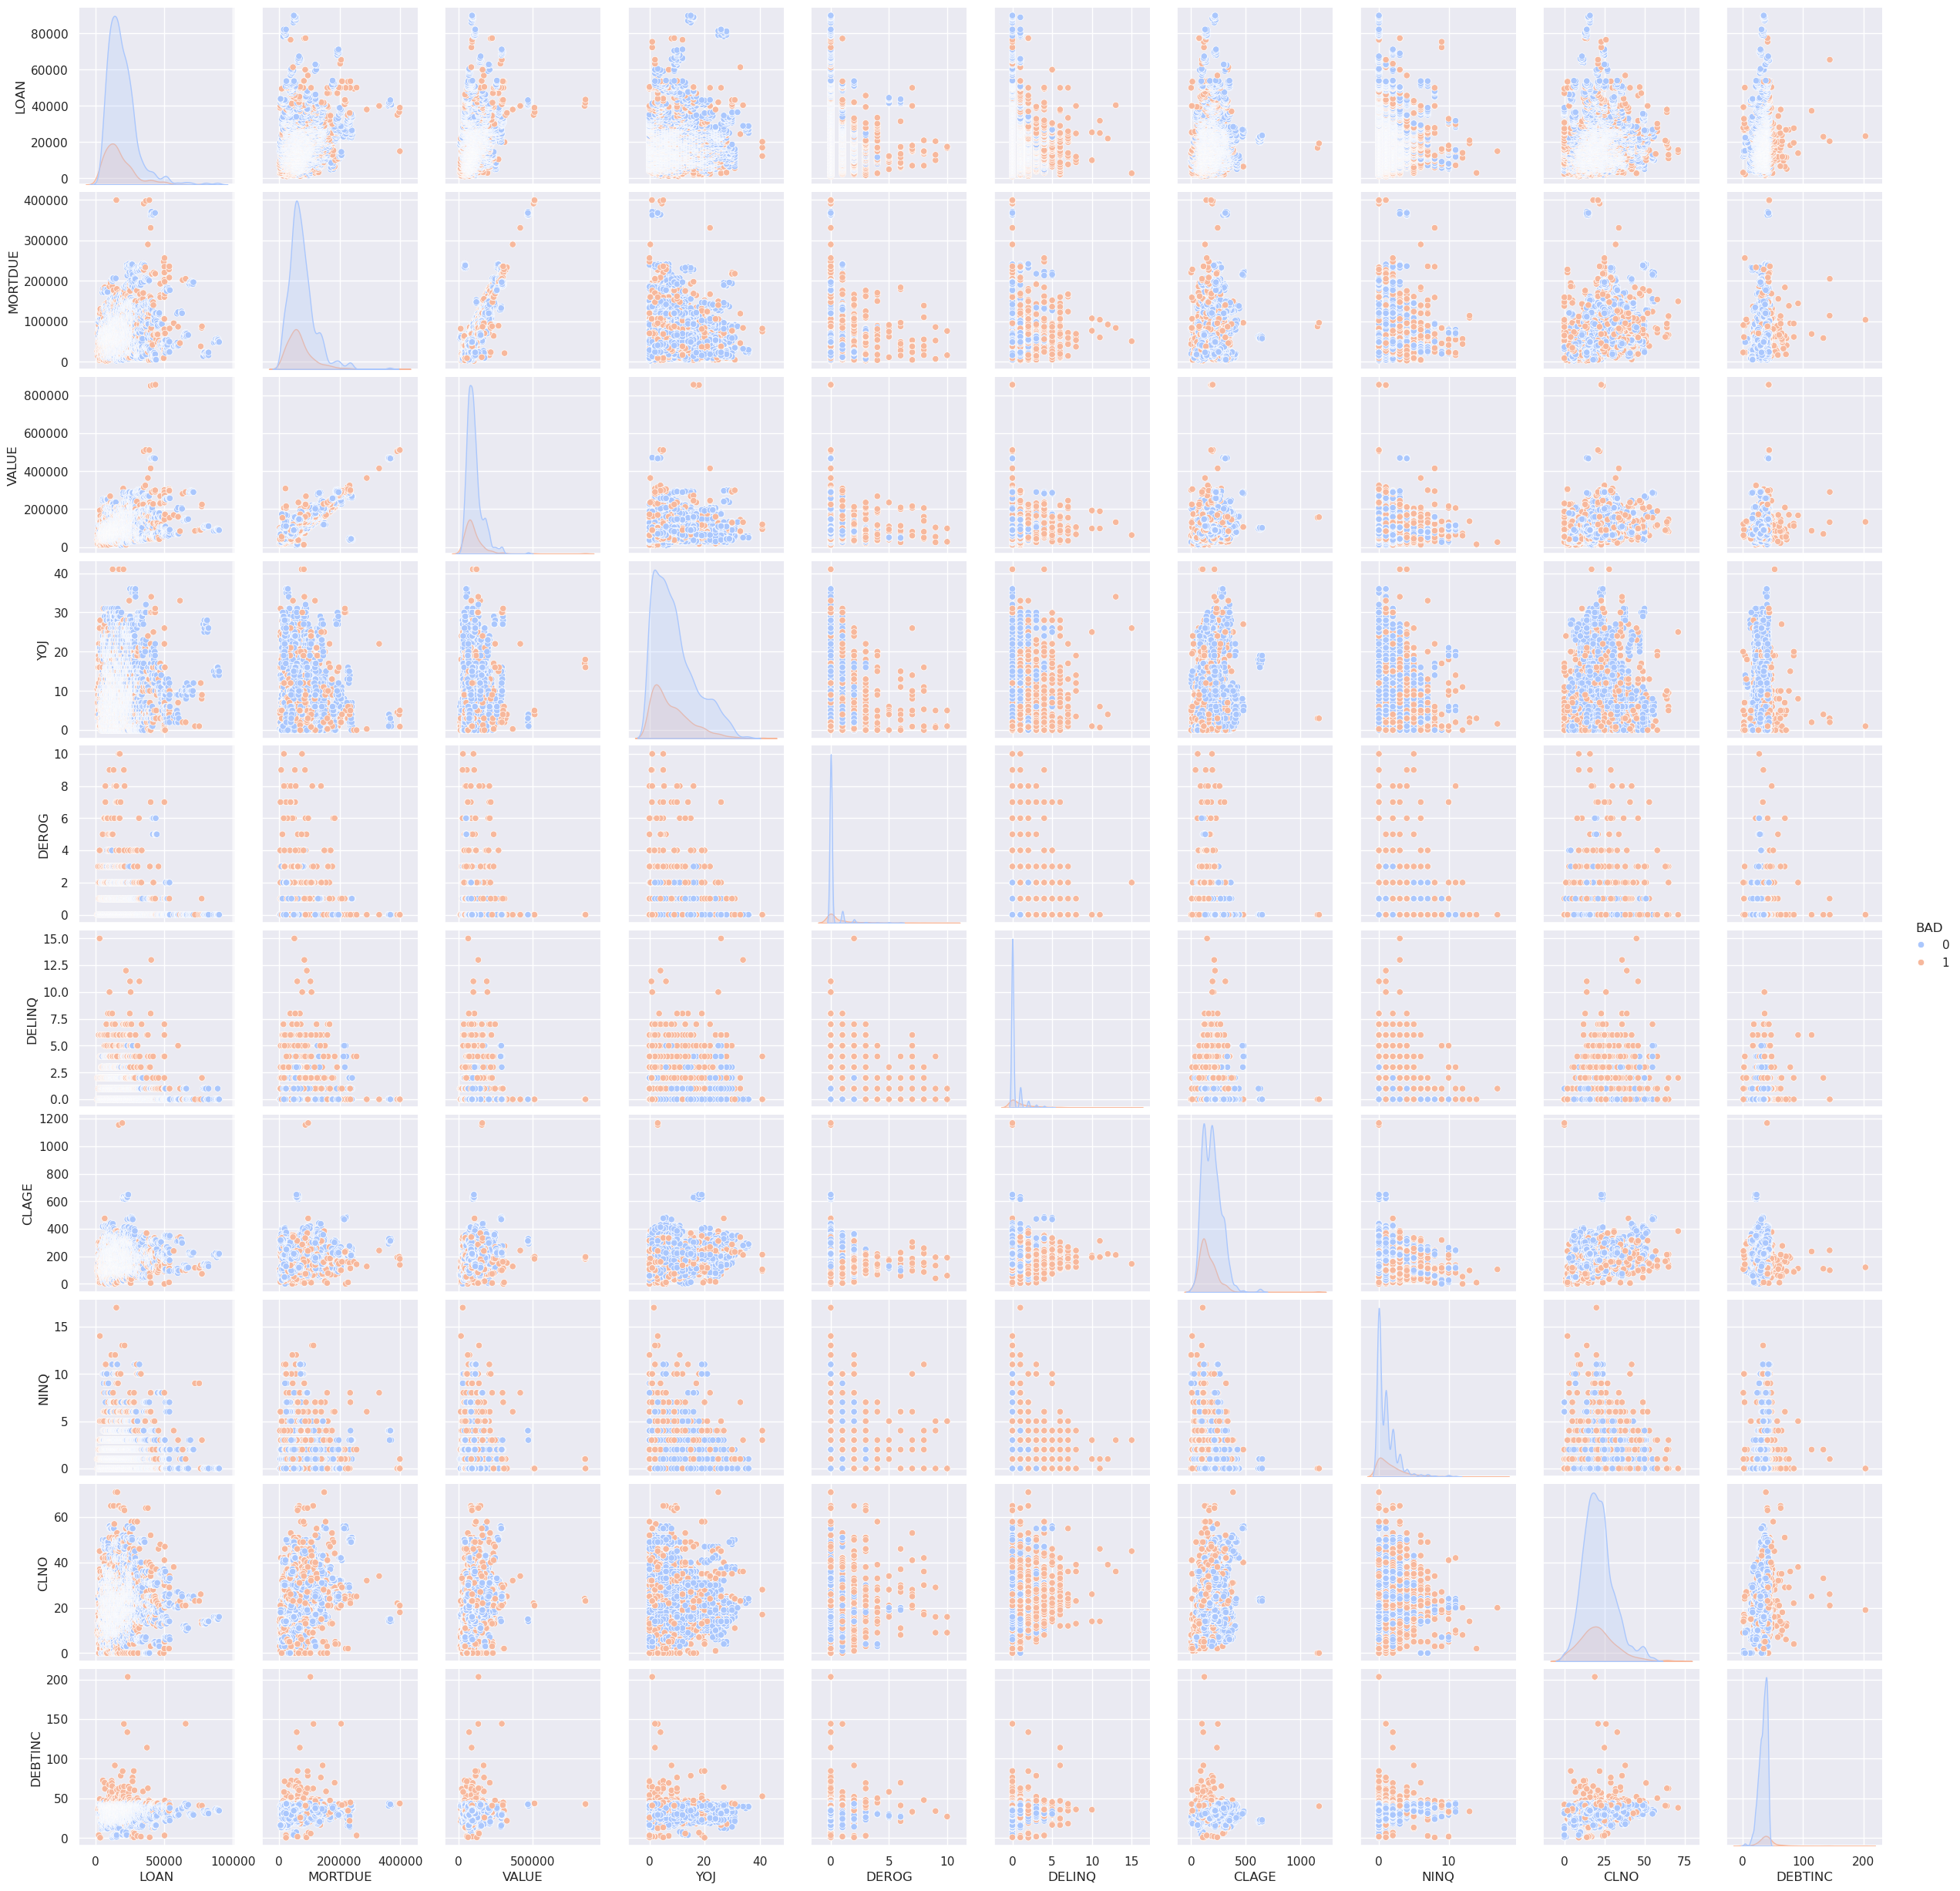

In [36]:
# Build pairplot for the hm_df with hue = 'BAD'
sns.pairplot(hm_df, hue='BAD', palette='coolwarm')
plt.show()

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [37]:
def treat_outliers(df, col):
    '''
    treats outliers in a variable
    col: str, name of the numerical variable
    df: hm_df frame
    col: name of the column
    '''
    
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  # define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)  # clipping the outliers to whisker values
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: hm_df frame
    '''
    for c in col_list:
        df = treat_outliers(df, c)
        
    return df

In [38]:
df_raw = hm_df.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

In [39]:
df

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  41600  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  41600  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  41600  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  41600  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  41600  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0        NaN  
1     121.833333   0.0  14.0        NaN  
2     149.466667   1.0  10.0        NaN  
3            NaN   NaN   NaN        NaN  
4      93.333333   0.0  14.0        NaN  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

#### Adding new columns in the dataset for each column which has missing values 

In [40]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the hm_dfframe
    col: it is column which has missing values
    It returns a hm_dfframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [41]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

#### Filling missing values in numerical columns with median and mode in categorical variables

In [42]:
# Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_hm_df = df.select_dtypes('number')

# Select string and object columns.
cat_hm_df = df.select_dtypes('category').columns.tolist()  # df.select_dtypes('object')

# Fill numeric columns with median.
df[num_hm_df.columns] = num_hm_df.fillna(num_hm_df.median())

# Fill object columns with mode.
for column in cat_hm_df:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

## **Important Insights from EDA**

What are the the most important observations and insights from the hm_df based on the EDA performed?

## **Model Building - Approach**
1. hm_df preparation
2. Partition the hm_df into train and test set
3. Fit on the train hm_df
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **hm_df Preparation**

### **Separating the target variable from other variables**

In [43]:
# Drop the dependent variable from the df DataFrame and create the X (independent variable) matrix
X = df.drop(columns=['BAD'])

# Create dummy variables for the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Create y (dependent variable)
y = df['BAD'].astype(int)

In [44]:
X.head()

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  1100  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1  1300  70053.0   68400.0   7.0    0.0     0.0  121.833333   0.0  14.0   
2  1500  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3  1500  65019.0   89235.5   7.0    0.0     0.0  173.466667   1.0  20.0   
4  1700  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   

     DEBTINC  ...  CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0  34.818262  ...                      False                     False   
1  34.818262  ...                      False                     False   
2  34.818262  ...                      False                     False   
3  34.818262  ...                       True                      True   
4  34.818262  ...                      False                     False   

   CLNO_missing_values_flag  DEBTINC_missing_values_flag  REASON_HomeImp  \
0                     False                         True            True   
1                     False                         True            True   
2                     False                         True            True   
3                      True                         True           False   
4                     False                         True            True   

   JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  
0       False       True        False      False     False  
1       False       True        False      False     False  
2       False       True        False      False     False  
3       False       True        False      False     False  
4        True      False        False      False     False  

[5 rows x 27 columns]

In [45]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64

In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
type(y)

pandas.core.series.Series

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LOAN                         5960 non-null   int64  
 1   MORTDUE                      5960 non-null   float64
 2   VALUE                        5960 non-null   float64
 3   YOJ                          5960 non-null   float64
 4   DEROG                        5960 non-null   float64
 5   DELINQ                       5960 non-null   float64
 6   CLAGE                        5960 non-null   float64
 7   NINQ                         5960 non-null   float64
 8   CLNO                         5960 non-null   float64
 9   DEBTINC                      5960 non-null   float64
 10  MORTDUE_missing_values_flag  5960 non-null   bool   
 11  VALUE_missing_values_flag    5960 non-null   bool   
 12  REASON_missing_values_flag   5960 non-null   bool   
 13  JOB_missing_values

In [49]:
# Split the df into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print(f"X_train shape is: {X_train.shape}, and its type is: {type(X_train)}")
print(f"X_test shape is: {X_test.shape}, and its type is: {type(X_test)}")
print(f"y_train shape: {y_train.shape}, and its type is: {type(y_train)}")
print(f"y_test shape: {y_test.shape}, and its type is: {type(y_test)}")

X_train shape is: (4768, 27), and its type is: <class 'pandas.core.frame.DataFrame'>
X_test shape is: (1192, 27), and its type is: <class 'pandas.core.frame.DataFrame'>
y_train shape: (4768,), and its type is: <class 'pandas.core.series.Series'>
y_test shape: (1192,), and its type is: <class 'pandas.core.series.Series'>


**Note that the train and test sets are in cudf format so we get to take advantage of GPU acceleration**

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the dataset is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [51]:
#@title
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [52]:
# Defining the Logistic regression model
logreg = LogisticRegression()

# Fitting the model on the training DataFrame
logreg.fit(X_train, y_train)

# You can now make predictions and evaluate your model
y_pred = logreg.predict(X_test)

#### Checking the performance on the train dataset

In [53]:
# Predict for train set
y_train_pred = logreg.predict(X_train)

# Checking the performance on the train dataset
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print("Classification Report for Training Set:")
print(train_report)
print("Confusion Matrix for Training Set:")
print(train_confusion_matrix)


Training Accuracy: 0.81
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3844
           1       0.51      0.02      0.05       924

    accuracy                           0.81      4768
   macro avg       0.66      0.51      0.47      4768
weighted avg       0.75      0.81      0.73      4768

Confusion Matrix for Training Set:
[[3822   22]
 [ 901   23]]


#### Checking the performance on the test dataset

In [54]:
# Predict for test set
y_test_pred = logreg.predict(X_test)

# Checking the performance on the test dataset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Test Set:")
print(test_report)
print("Confusion Matrix for Test Set:")
print(test_confusion_matrix)

Test Accuracy: 0.78
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       927
           1       0.67      0.03      0.06       265

    accuracy                           0.78      1192
   macro avg       0.72      0.51      0.47      1192
weighted avg       0.76      0.78      0.69      1192

Confusion Matrix for Test Set:
[[923   4]
 [257   8]]


**Insights:**

#### Overall Performance
- **Test Accuracy: 0.78**: The model correctly classified 78% of the samples in the test set.

#### Classification Report
- **Class 0 (majority class)**:
  - **Precision: 0.78**: Out of all predicted positives for class 0, 78% were true positives.
  - **Recall: 1.00**: Out of all actual positives for class 0, 100% were correctly predicted.
  - **F1-Score: 0.88**: Combines precision and recall, indicating strong performance for class 0.
  
- **Class 1 (minority class)**:
  - **Precision: 0.67**: Out of all predicted positives for class 1, 67% were true positives.
  - **Recall: 0.03**: Out of all actual positives for class 1, only 3% were correctly predicted.
  - **F1-Score: 0.06**: Shows poor performance for class 1, due to very low recall.

- **Macro Average**:
  - **Precision: 0.72**: Average precision across both classes.
  - **Recall: 0.51**: Average recall across both classes, significantly impacted by the low recall for class 1.
  - **F1-Score: 0.47**: Average F1-score across both classes.

- **Weighted Average**:
  - **Precision: 0.76**: Precision weighted by the number of samples in each class.
  - **Recall: 0.78**: Recall weighted by the number of samples in each class.
  - **F1-Score: 0.69**: F1-score weighted by the number of samples in each class.

#### Confusion Matrix
- **Class 0 (Actual Positives)**:
  - **True Positives: 923**: Correctly classified as class 0.
  - **False Negatives: 4**: Incorrectly classified as class 1.
  
- **Class 1 (Actual Negatives)**:
  - **True Negatives: 8**: Correctly classified as class 1.
  - **False Positives: 257**: Incorrectly classified as class 0.

### Summary
- The model performs well for class 0 with high precision, recall, and F1-score. This indicates that it is very effective at identifying the majority class.
- The performance for class 1 is poor, with low recall and F1-score. This suggests the model struggles to correctly identify instances of the minority class, leading to many false negatives.
- The confusion matrix confirms that while the model performs well at identifying class 0, it fails to capture most of the class 1 instances.
- The overall accuracy is 78%, but the imbalance in precision and recall between the two classes highlights the need for further model tuning or alternative approaches to better handle the minority class.

These insights indicate areas where the logistic regression model may need improvements, particularly in handling class imbalance to boost performance for the minority class.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [55]:
import pandas as pd

# Get the coefficients from the logistic regression model
coefficients = logreg.coef_[0]

# Create a DataFrame to display the coefficients and the corresponding feature names
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Print the DataFrame sorted by the coefficients
print(coef_df.sort_values(by='Coefficient', ascending=False))


                        Feature   Coefficient
20  DEBTINC_missing_values_flag  2.980367e-02
7                          NINQ  2.807023e-02
9                       DEBTINC  2.364991e-02
11    VALUE_missing_values_flag  4.358869e-03
26                     JOB_Self  1.589277e-03
21               REASON_HomeImp  1.264192e-03
25                    JOB_Sales  1.098316e-03
17    CLAGE_missing_values_flag  9.394776e-04
10  MORTDUE_missing_values_flag  1.761684e-04
19     CLNO_missing_values_flag  1.349366e-04
2                         VALUE  4.612552e-07
4                         DEROG  0.000000e+00
5                        DELINQ  0.000000e+00
1                       MORTDUE -5.775214e-06
0                          LOAN -2.573153e-05
12   REASON_missing_values_flag -2.267276e-04
23                    JOB_Other -2.635136e-04
24                  JOB_ProfExe -1.023991e-03
14      YOJ_missing_values_flag -1.633685e-03
18     NINQ_missing_values_flag -2.242729e-03
13      JOB_missing_values_flag -2

In [56]:
X.columns

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'MORTDUE_missing_values_flag',
       'VALUE_missing_values_flag', 'REASON_missing_values_flag',
       'JOB_missing_values_flag', 'YOJ_missing_values_flag',
       'DEROG_missing_values_flag', 'DELINQ_missing_values_flag',
       'CLAGE_missing_values_flag', 'NINQ_missing_values_flag',
       'CLNO_missing_values_flag', 'DEBTINC_missing_values_flag',
       'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales',
       'JOB_Self'],
      dtype='object')

In [57]:
coefficients

array([-2.57315331e-05, -5.77521381e-06,  4.61255194e-07, -3.76680165e-02,
        0.00000000e+00,  0.00000000e+00, -6.44260946e-03,  2.80702296e-02,
       -2.84840696e-03,  2.36499094e-02,  1.76168412e-04,  4.35886936e-03,
       -2.26727561e-04, -2.27104604e-03, -1.63368534e-03, -4.15132781e-03,
       -3.34172822e-03,  9.39477618e-04, -2.24272890e-03,  1.34936581e-04,
        2.98036675e-02,  1.26419196e-03, -4.38621863e-03, -2.63513640e-04,
       -1.02399090e-03,  1.09831622e-03,  1.58927669e-03])

**Insights:**

### Insights from Logistic Regression Coefficients

#### Positive Coefficients
- **DEBTINC_missing_values_flag (0.0298)**: Indicates that when this flag is set, the likelihood of the target being positive increases.
- **NINQ (0.0281)** and **DEBTINC (0.0236)**: Suggests a positive relationship with the target variable.
- **VALUE_missing_values_flag (0.0044)**: Missing values in the VALUE feature positively impact the target.
- **Various JOB categories (Self, Sales, Home Improvement, etc.)**: Have smaller positive coefficients, indicating a mild positive impact.

#### Near Zero or Neutral Impact
- **VALUE (4.612552e-07)**: Has almost no impact on the target.
- **DEROG and DELINQ (0.0)**: These features don't influence the target in this model, possibly due to lack of variation or relevance.

#### Negative Coefficients
- **YOJ (-0.0377)** and **CLAGE (-0.0064)**: Show a negative relationship, indicating that higher values of these features reduce the likelihood of the target being positive.
- **Various missing values flags (NINQ, DEROG, CLNO, etc.)**: Several missing value flags have negative coefficients, suggesting a negative impact when these values are missing.
- **Other JOB categories (Office, ProfExe, Other)**: Have small negative coefficients, indicating a mild negative impact.

### Summary
- **Important Features**: DEBTINC and NINQ stand out as influential features.
- **Flags for Missing Values**: Both positively and negatively impact the target, indicating the importance of handling missing values appropriately.
- **Occupation Categories**: JOB categories have varying degrees of influence, both positive and negative.


### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [58]:
#@title
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in hm_df.columns if hm_df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(hm_df,colmn)

In [59]:
#@title
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_hm_df = hm_df.select_dtypes('number')

# Select string and object columns.
cat_hm_df = hm_df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Fill numeric columns with median.
hm_df[num_hm_df.columns] = num_hm_df.fillna(num_hm_df.median())

# Fill object columns with mode.
for column in cat_hm_df:
    mode = hm_df[column].mode()[0]
    hm_df[column] = hm_df[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [60]:
# Drop dependent variable from hm_cudf_dfframe and create the X (independent variable) matrix
X = hm_df.drop(columns=['BAD'])

# Create dummy variables for the categorical variables using the get_dummies() function
X = pd.get_dummies(X, drop_first=True)

# Create y (dependent variable)
y = hm_df['BAD']

#### Split the hm_df

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model with class weights
dectreeclass = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

In [63]:
# Fitting the Decision Tree model
dectreeclass.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

#### Checking the performance on the train dataset

In [64]:
# Checking performance on the training hm_df
y_train_pred = dectreeclass.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report for Training Set:")
print(train_report)
print("Confusion Matrix for Training Set:")
print(train_confusion_matrix)

Train Accuracy: 1.00
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3844
           1       1.00      1.00      1.00       924

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

Confusion Matrix for Training Set:
[[3844    0]
 [   0  924]]


#### Checking the performance on the test dataset

In [65]:
# Checking performance on the testing hm_df
y_test_pred = dectreeclass.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Testing Set:")
print(test_report)
print("Confusion Matrix for Testing Set:")
print(test_confusion_matrix)

Test Accuracy: 0.88
Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       927
           1       0.74      0.67      0.71       265

    accuracy                           0.88      1192
   macro avg       0.83      0.80      0.81      1192
weighted avg       0.87      0.88      0.87      1192

Confusion Matrix for Testing Set:
[[866  61]
 [ 87 178]]


**Insights:**

#### Overall Performance
- **Test Accuracy: 0.88**: The model correctly classified 88% of the samples in the test set.

#### Classification Report
- **Class 0 (majority class)**:
  - **Precision: 0.91**: Out of all predicted positives for class 0, 91% were true positives.
  - **Recall: 0.93**: Out of all actual positives for class 0, 93% were correctly predicted.
  - **F1-Score: 0.92**: Combines precision and recall, indicating good performance for class 0.
  
- **Class 1 (minority class)**:
  - **Precision: 0.74**: Out of all predicted positives for class 1, 74% were true positives.
  - **Recall: 0.67**: Out of all actual positives for class 1, 67% were correctly predicted.
  - **F1-Score: 0.71**: Shows that the model has decent but not perfect performance for class 1.

- **Macro Average**:
  - **Precision: 0.83**: Average precision across both classes.
  - **Recall: 0.80**: Average recall across both classes.
  - **F1-Score: 0.81**: Average F1-score across both classes.

- **Weighted Average**:
  - **Precision: 0.87**: Precision weighted by the number of samples in each class.
  - **Recall: 0.88**: Recall weighted by the number of samples in each class.
  - **F1-Score: 0.87**: F1-score weighted by the number of samples in each class.

#### Confusion Matrix
- **Class 0 (Actual Positives)**:
  - **True Positives: 866**: Correctly classified as class 0.
  - **False Negatives: 61**: Incorrectly classified as class 1.
  
- **Class 1 (Actual Negatives)**:
  - **True Negatives: 178**: Correctly classified as class 1.
  - **False Positives: 87**: Incorrectly classified as class 0.

### Summary
- The model performs well overall, with a high accuracy of 88%. 
- It handles the majority class (class 0) very effectively, with high precision and recall.
- There is a trade-off in the performance of the minority class (class 1), where precision and recall are slightly lower, but still decent.
- The confusion matrix shows that the model has a good balance of true positives and true negatives, with a reasonable number of false negatives and false positives.

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [73]:
# Choose the type of classifier
clf = DecisionTreeClassifier()

# Grid of parameters to choose from
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Type of scoring used to compare parameter combinations
scoring = 'accuracy'

# Run the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)

# Fit the GridSearch on train dataset
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_clf = grid_search.best_estimator_

# Fit the best algorithm to the hm_df
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_clf.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Test Set:")
print(test_report)
print("Confusion Matrix for Test Set:")
print(test_confusion_matrix)

Test Accuracy: 0.89
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       927
           1       0.82      0.62      0.70       265

    accuracy                           0.89      1192
   macro avg       0.86      0.79      0.82      1192
weighted avg       0.88      0.89      0.88      1192

Confusion Matrix for Test Set:
[[892  35]
 [102 163]]


#### Checking the performance on the train dataset

In [74]:
# Checking performance on the training hm_df based on the tuned model
y_train_pred = best_clf.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report for Training Set:")
print(train_report)
print("Confusion Matrix for Training Set:")
print(train_confusion_matrix)

Train Accuracy: 0.94
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3844
           1       0.92      0.73      0.81       924

    accuracy                           0.94      4768
   macro avg       0.93      0.86      0.89      4768
weighted avg       0.93      0.94      0.93      4768

Confusion Matrix for Training Set:
[[3788   56]
 [ 252  672]]


#### Checking the performance on the test dataset

In [75]:
# Checking performance on the testing hm_df based on the tuned model
y_test_pred = best_clf.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Testing Set:")
print(test_report)
print("Confusion Matrix for Testing Set:")
print(test_confusion_matrix)

Test Accuracy: 0.89
Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       927
           1       0.82      0.62      0.70       265

    accuracy                           0.89      1192
   macro avg       0.86      0.79      0.82      1192
weighted avg       0.88      0.89      0.88      1192

Confusion Matrix for Testing Set:
[[892  35]
 [102 163]]


**Insights:**

### Insights from the Decision Tree Classifier

#### Overall Performance
- **Test Accuracy: 0.89**: The model correctly classified 89% of the samples in the test set.

#### Classification Report
- **Class 0 (majority class)**:
  - **Precision: 0.90**: Out of all predicted positives for class 0, 90% were true positives.
  - **Recall: 0.96**: Out of all actual positives for class 0, 96% were correctly predicted.
  - **F1-Score: 0.93**: Combines precision and recall, indicating strong performance for class 0.
  
- **Class 1 (minority class)**:
  - **Precision: 0.82**: Out of all predicted positives for class 1, 82% were true positives.
  - **Recall: 0.62**: Out of all actual positives for class 1, 62% were correctly predicted.
  - **F1-Score: 0.70**: Shows good performance for class 1, though there's room for improvement.

- **Macro Average**:
  - **Precision: 0.86**: Average precision across both classes.
  - **Recall: 0.79**: Average recall across both classes.
  - **F1-Score: 0.82**: Average F1-score across both classes.

- **Weighted Average**:
  - **Precision: 0.88**: Precision weighted by the number of samples in each class.
  - **Recall: 0.89**: Recall weighted by the number of samples in each class.
  - **F1-Score: 0.88**: F1-score weighted by the number of samples in each class.

#### Confusion Matrix
- **Class 0 (Actual Positives)**:
  - **True Positives: 892**: Correctly classified as class 0.
  - **False Negatives: 35**: Incorrectly classified as class 1.
  
- **Class 1 (Actual Negatives)**:
  - **True Negatives: 163**: Correctly classified as class 1.
  - **False Positives: 102**: Incorrectly classified as class 0.

### Summary
- The model performs exceptionally well for class 0, with high precision, recall, and F1-score. This indicates strong performance in identifying the majority class.
- The performance for class 1 is quite good, though there is room for improvement, particularly in recall.
- The high overall accuracy of 89% indicates that the model is effective at making correct classifications.
- The confusion matrix shows that while the model does a good job of correctly classifying both classes, there are still some false negatives and false positives, especially for class 1.

These insights suggest that the Decision Tree model is well-balanced and effective, with strong performance across various metrics. Further tuning or alternative approaches could be considered to improve the recall for the minority class if needed.

#### Plotting the Decision Tree

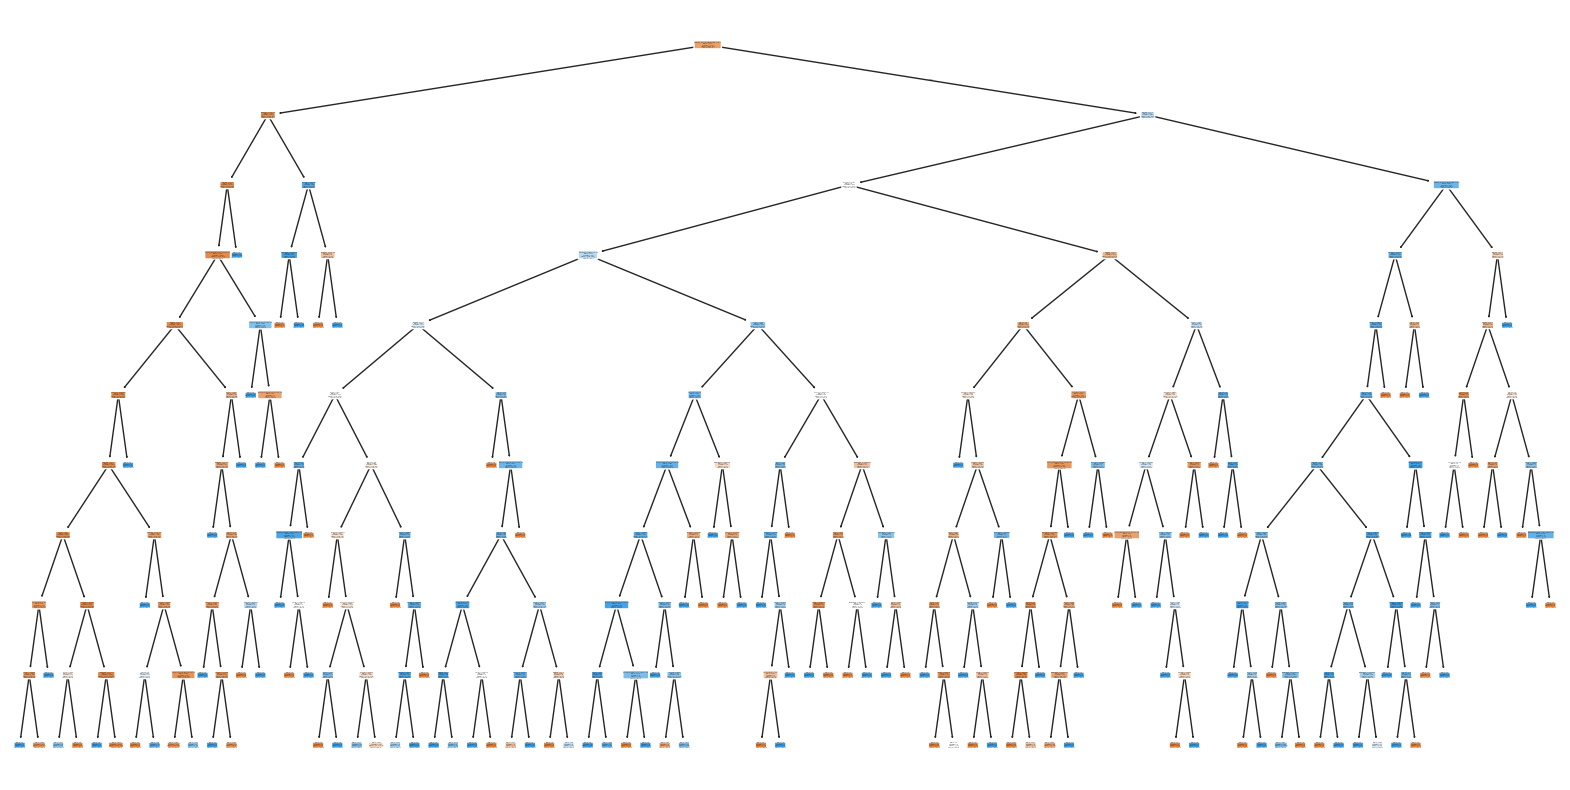

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.show()

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [81]:
# Defining Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier to the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Checking the performance on the train dataset

In [82]:
# Checking performance on the training hm_df
y_train_pred = rf_clf.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report for Training Set:")
print(train_report)
print("Confusion Matrix for Training Set:")
print(train_confusion_matrix)

Train Accuracy: 1.00
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3844
           1       1.00      1.00      1.00       924

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

Confusion Matrix for Training Set:
[[3844    0]
 [   0  924]]


#### Checking the performance on the test dataset

In [83]:
# Checking performance on the test hm_df
y_test_pred = rf_clf.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Test Set:")
print(test_report)
print("Confusion Matrix for Test Set:")
print(test_confusion_matrix)

Test Accuracy: 0.91
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       927
           1       0.85      0.74      0.79       265

    accuracy                           0.91      1192
   macro avg       0.89      0.85      0.87      1192
weighted avg       0.91      0.91      0.91      1192

Confusion Matrix for Test Set:
[[892  35]
 [ 70 195]]


**Observations:**

#### Overall Performance
- **Test Accuracy: 0.91**: The model correctly classified 91% of the samples in the test set.

#### Classification Report
- **Class 0 (majority class)**:
  - **Precision: 0.93**: Out of all predicted positives for class 0, 93% were true positives.
  - **Recall: 0.96**: Out of all actual positives for class 0, 96% were correctly predicted.
  - **F1-Score: 0.94**: Combines precision and recall, indicating excellent performance for class 0.
  
- **Class 1 (minority class)**:
  - **Precision: 0.85**: Out of all predicted positives for class 1, 85% were true positives.
  - **Recall: 0.74**: Out of all actual positives for class 1, 74% were correctly predicted.
  - **F1-Score: 0.79**: Shows strong performance for class 1, but there's still room for improvement in recall.

- **Macro Average**:
  - **Precision: 0.89**: Average precision across both classes.
  - **Recall: 0.85**: Average recall across both classes.
  - **F1-Score: 0.87**: Average F1-score across both classes.

- **Weighted Average**:
  - **Precision: 0.91**: Precision weighted by the number of samples in each class.
  - **Recall: 0.91**: Recall weighted by the number of samples in each class.
  - **F1-Score: 0.91**: F1-score weighted by the number of samples in each class.

#### Confusion Matrix
- **Class 0 (Actual Positives)**:
  - **True Positives: 892**: Correctly classified as class 0.
  - **False Negatives: 35**: Incorrectly classified as class 1.
  
- **Class 1 (Actual Negatives)**:
  - **True Negatives: 195**: Correctly classified as class 1.
  - **False Positives: 70**: Incorrectly classified as class 0.

### Summary
- The model performs exceptionally well for class 0, with high precision, recall, and F1-score. This indicates strong performance in identifying the majority class.
- The performance for class 1 is quite strong, though there is room for improvement, particularly in recall.
- The high overall accuracy of 91% demonstrates the model's effectiveness in making correct classifications.
- The confusion matrix shows that the model does a good job of correctly classifying both classes, with a relatively low number of false negatives and false positives.

These insights suggest that the Random Forest model is highly effective and well-balanced, with robust performance across various metrics. Further tuning or alternative approaches could be considered to improve the recall for the minority class if needed.

### **Build a Random Forest model with Class Weights**

In [84]:
# Defining Random Forest model with class weights
rf_clf = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

# Fitting Random Forest model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

#### Checking the performance on the train dataset

In [85]:
# Checking performance on the train hm_df
y_train_pred = rf_clf.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report for Training Set:")
print(train_report)
print("Confusion Matrix for Training Set:")
print(train_confusion_matrix)

Train Accuracy: 1.00
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3844
           1       1.00      1.00      1.00       924

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

Confusion Matrix for Training Set:
[[3844    0]
 [   0  924]]


#### Checking the performance on the test dataset

In [86]:
# Checking performance on the test hm_df
y_test_pred = rf_clf.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Test Set:")
print(test_report)
print("Confusion Matrix for Test Set:")
print(test_confusion_matrix)

Test Accuracy: 0.90
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       927
           1       0.85      0.69      0.76       265

    accuracy                           0.90      1192
   macro avg       0.88      0.83      0.85      1192
weighted avg       0.90      0.90      0.90      1192

Confusion Matrix for Test Set:
[[894  33]
 [ 81 184]]


### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Choose the type of classifier
clf = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [{0: 0.2, 1: 0.8}, 'balanced', None]
}

# Type of scoring used to compare parameter combinations
scoring = 'accuracy'

# Run the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)

# Fit the GridSearch on train dataset
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_clf = grid_search.best_estimator_

# Fit the best algorithm to the hm_df
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_clf.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Test Set:")
print(test_report)
print("Confusion Matrix for Test Set:")
print(test_confusion_matrix)

Test Accuracy: 0.91
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       927
           1       0.86      0.72      0.79       265

    accuracy                           0.91      1192
   macro avg       0.89      0.85      0.86      1192
weighted avg       0.91      0.91      0.91      1192

Confusion Matrix for Test Set:
[[895  32]
 [ 73 192]]


#### Checking the performance on the train dataset

In [88]:
# Checking performance on the training hm_df
y_train_pred = best_clf.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report for Training Set:")
print(train_report)
print("Confusion Matrix for Training Set:")
print(train_confusion_matrix)

Train Accuracy: 1.00
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3844
           1       1.00      1.00      1.00       924

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

Confusion Matrix for Training Set:
[[3844    0]
 [   0  924]]


#### Checking the performance on the test dataset

In [89]:
# Checking performance on the test hm_df
y_test_pred = best_clf.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Test Set:")
print(test_report)
print("Confusion Matrix for Test Set:")
print(test_confusion_matrix)

Test Accuracy: 0.91
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       927
           1       0.86      0.72      0.79       265

    accuracy                           0.91      1192
   macro avg       0.89      0.85      0.86      1192
weighted avg       0.91      0.91      0.91      1192

Confusion Matrix for Test Set:
[[895  32]
 [ 73 192]]


**Insights:**

### Insights from the Tuned Random Forest Classifier

#### Overall Performance
- **Test Accuracy: 0.91**: The model correctly classified 91% of the samples in the test set.

#### Classification Report
- **Class 0 (majority class)**:
  - **Precision: 0.92**: Out of all predicted positives for class 0, 92% were true positives.
  - **Recall: 0.97**: Out of all actual positives for class 0, 97% were correctly predicted.
  - **F1-Score: 0.94**: Combines precision and recall, indicating excellent performance for class 0.
  
- **Class 1 (minority class)**:
  - **Precision: 0.86**: Out of all predicted positives for class 1, 86% were true positives.
  - **Recall: 0.72**: Out of all actual positives for class 1, 72% were correctly predicted.
  - **F1-Score: 0.79**: Shows strong performance for class 1, but there's still room for improvement in recall.

- **Macro Average**:
  - **Precision: 0.89**: Average precision across both classes.
  - **Recall: 0.85**: Average recall across both classes.
  - **F1-Score: 0.86**: Average F1-score across both classes.

- **Weighted Average**:
  - **Precision: 0.91**: Precision weighted by the number of samples in each class.
  - **Recall: 0.91**: Recall weighted by the number of samples in each class.
  - **F1-Score: 0.91**: F1-score weighted by the number of samples in each class.

#### Confusion Matrix
- **Class 0 (Actual Positives)**:
  - **True Positives: 895**: Correctly classified as class 0.
  - **False Negatives: 32**: Incorrectly classified as class 1.
  
- **Class 1 (Actual Negatives)**:
  - **True Negatives: 192**: Correctly classified as class 1.
  - **False Positives: 73**: Incorrectly classified as class 0.

### Summary
- The model performs exceptionally well for class 0, with high precision, recall, and F1-score. This indicates strong performance in identifying the majority class.
- The performance for class 1 is quite strong, though there is room for improvement, particularly in recall.
- The high overall accuracy of 91% demonstrates the model's effectiveness in making correct classifications.
- The confusion matrix shows that the model does a good job of correctly classifying both classes, with a relatively low number of false negatives and false positives.

These insights suggest that the tuned Random Forest model is highly effective and well-balanced, with robust performance across various metrics. Further tuning or alternative approaches could be considered to improve the recall for the minority class if needed.

#### Plot the Feature importance of the tuned Random Forest

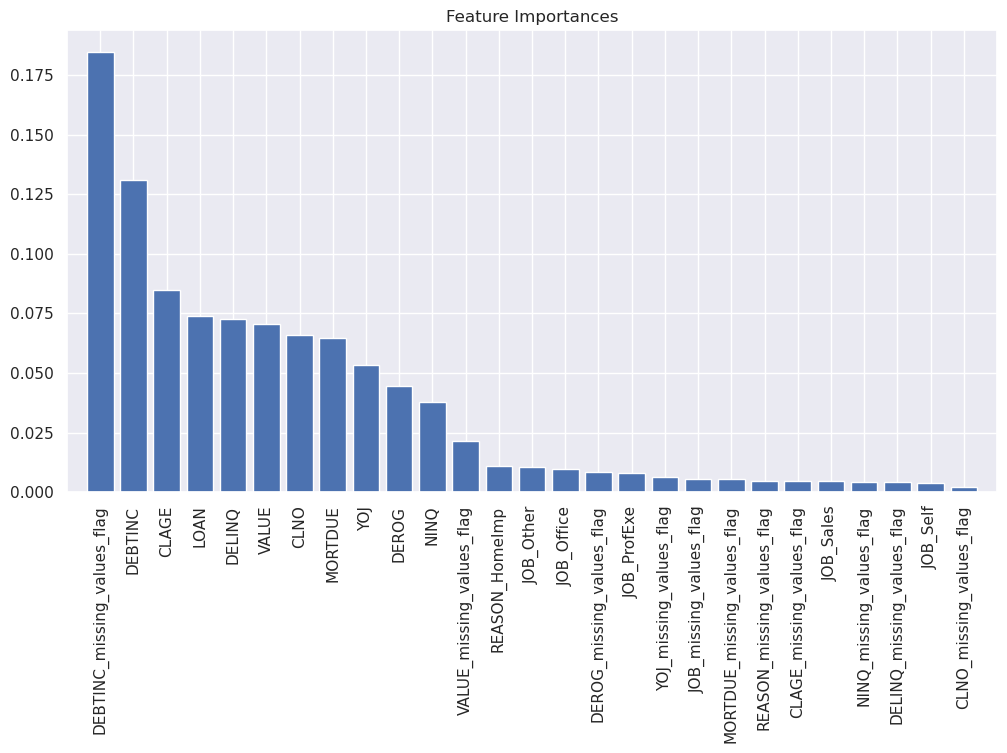

Test Accuracy: 0.91
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       927
           1       0.86      0.72      0.79       265

    accuracy                           0.91      1192
   macro avg       0.89      0.85      0.86      1192
weighted avg       0.91      0.91      0.91      1192

Confusion Matrix for Test Set:
[[895  32]
 [ 73 192]]


In [91]:
# Importance of features in the tree building (Gini importance)
feature_importances = best_clf.feature_importances_
features = X.columns

# Sorting the features by importance
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Checking performance on the test hm_df
y_test_pred = best_clf.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report for Test Set:")
print(test_report)
print("Confusion Matrix for Test Set:")
print(test_confusion_matrix)

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [92]:
#@title
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [93]:
#@title
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [94]:
#@title
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [101]:
#@title
# Make the list of all the model names 

models = [logreg, dectreeclass, rf_clf]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [103]:
# Mention the Model names in the list
comparison_frame = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Logistic Regression        0.807676       0.782718      0.031385   
1        Decision Tree        1.000000       0.875839      1.000000   
2        Random Forest        1.000000       0.904362      1.000000   

   Test_Recall  Train_Precision  Test_Precision  
0     0.037736         0.568627        0.714286  
1     0.671698         1.000000        0.744770  
2     0.694340         1.000000        0.847926

**Insights:**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**

- **Logistic Regression**:
  - **Train Accuracy**: 0.81
  - **Test Accuracy**: 0.78
  - **Train Recall**: 0.03
  - **Test Recall**: 0.04
  - **Train Precision**: 0.57
  - **Test Precision**: 0.71

- **Decision Tree**:
  - **Train Accuracy**: 1.00
  - **Test Accuracy**: 0.88
  - **Train Recall**: 1.00
  - **Test Recall**: 0.67
  - **Train Precision**: 1.00
  - **Test Precision**: 0.74

- **Random Forest**:
  - **Train Accuracy**: 1.00
  - **Test Accuracy**: 0.90
  - **Train Recall**: 1.00
  - **Test Recall**: 0.69
  - **Train Precision**: 1.00
  - **Test Precision**: 0.85

**Performance Analysis**:
- The **Random Forest** model is performing relatively better than the other models with a test accuracy of 0.90, which is higher than Logistic Regression and Decision Tree.
- **Logistic Regression** shows a lower test accuracy and recall compared to the other models, indicating it might not be the best choice for this problem.
- Both **Decision Tree** and **Random Forest** show perfect accuracy, recall, and precision on the training data, indicating they might be overfitting the training data. However, the Random Forest model generalizes better on the test data with higher test accuracy, recall, and precision compared to the Decision Tree.

**Scope for Improvement**:
- There is still scope to improve the recall and precision for the minority class (Class 1). Techniques like **hyperparameter tuning**, **ensemble methods** (like boosting), and **feature engineering** could be explored further.
- **Cross-validation** and **regularization** techniques can be applied to avoid overfitting.

**2. Refined insights:**

- The Random Forest model provides a good balance between recall and precision for both classes, making it suitable for the problem at hand.
- The high training performance of the Decision Tree suggests it might be capturing noise in the training data, leading to overfitting.
- Logistic Regression, while simpler, may not be capturing the complexity of the data, resulting in lower performance metrics.

**3. Proposal for the final solution design:**

**Proposed Model**: **Random Forest**

**Reasons**:
- **Balanced Performance**: The Random Forest model offers a good balance between accuracy, recall, and precision, making it robust for predicting both classes.
- **Better Generalization**: It shows better generalization on test data compared to the Decision Tree, indicating its ability to handle unseen data effectively.
- **Feature Importance**: Random Forest also provides insights into feature importance, which can be useful for understanding the data and making informed decisions.
- **Ensemble Nature**: Being an ensemble method, it reduces the risk of overfitting compared to a single Decision Tree.

In conclusion, the Random Forest model is recommended due to its superior generalization performance, balanced metrics, and ability to handle complex datasets effectively. Further tuning and feature engineering can enhance its performance even more.